<a href="https://colab.research.google.com/github/starlordsumit/DATA-ANALYSIS-PROJECTS/blob/main/ANALYSIS_OF_METEOROLOGICAL_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANALYSIS OF METEOROLOGICAL DATA

### By Sumit Ranjan

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv('/content/Weather_Data.csv')

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
df.shape

(8784, 8)

In [ ]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date']

KeyError: ignored

In [ ]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [ ]:
df = df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:

#after resampling
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df[data_columns].resample('MS').mean()
df_monthly_mean.head()

NameError: ignored

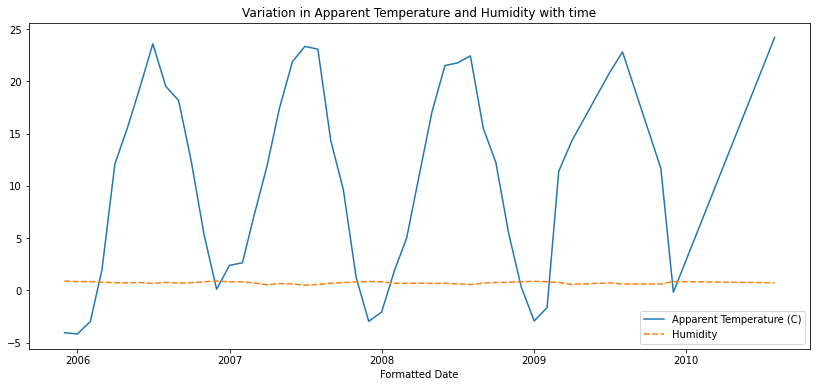

In [ ]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

From the plot, we can say that humidity remained almost constant in these 10 years. Even the average apparent temperature is almost same (as peaks lie on the same line)
retrieving the data of a particular month from every year, say April

In [ ]:
df1 = df_monthly_mean[df_monthly_mean.index.month==4]
print(df1)
df1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.276640  0.567284
2010-04-01 00:00:00+00:00                       NaN       NaN


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

ConversionError: ignored

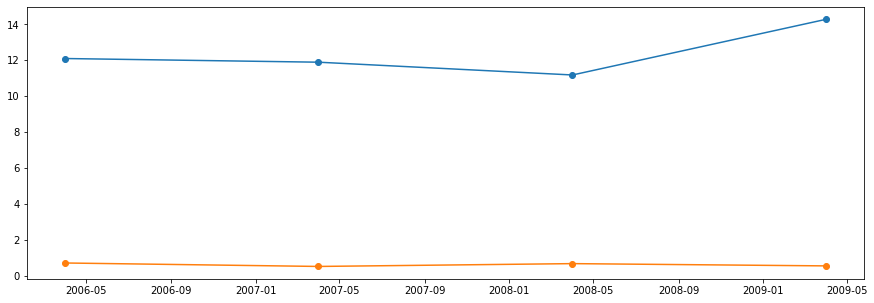

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['04-01-2006','04-01-2007','04-01-2008','04-01-2009','04-01-2010','04-01-2011','04-01-2012','04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')